# Introduction

<strong>Olist</strong> souhaite fourninr à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.
L'objectif de ce projet est de :
<ul>
    <li><strong>Comprendre les différents types d’utilisateur</strong>, grâce aux données <em>anonymisées</em> entre <strong>2017</strong> et <strong>2018</strong> :
        <ul>
            <li>Historique de <strong>100 000</strong> commandes ;</li>
            <li>Paiements ;</li>
            <li>Produits achetés ;</li>
            <li>Commentaires de satisfaction ;</li>
            <li>Localisation ;</li>            
        </ul>
    </li>
    <li><strong>Fournir une description actionable</strong> de la segmentation et de sa logique sous-jacente pour une utilisation optimale.</li>
    <li><strong>Proposer un contrat de maintenance</strong>  basée sur une analyse de la stabilité des segments au cours du temps.</li>
</ul>

Ce premier notebook décrit l’analyse exploratoire des données et le feature engineering effectué en préparation des essais des différentes approches de modélisation dans le second notebook.

In [13]:
# Librairies personnalisées
from my_functions.common_functions import *
from my_functions.uni_bi_variate_functions import *
from my_functions.machine_learning_common_functions import *

%matplotlib inline
low_memory=False # faible mémoire vive (RAM) pour gérer la lecture de gros fichiers

# 1. Chargement, Nettoyage & Fusion des Données

Les données sont distribuées sur plusieurs tables de la base de données d'<strong>Olist</strong>. Il faut donc, les fusionner et les nettoyer avant tout.

## 1.1. Clients

Le data set contient :
	- 99441 lignes et 5 colonnes.
	- 0 valeurs manquantes, ce qui représente 0.0 % du data set.
Voici un sous-échantillon aléatoire :


customer_id                customer_unique_id  \
7444   f3ab792588cfcc343d4c21098e34706c  9473d390db618afddbd04e915b2bef1a   
21730  87d9815311b8ea68720364a6b3a43eb4  d3b23e5263198356479f66010c747a6f   

       customer_zip_code_prefix customer_city customer_state  
7444                       7776       cajamar             SP  
21730                     91710  porto alegre             RS

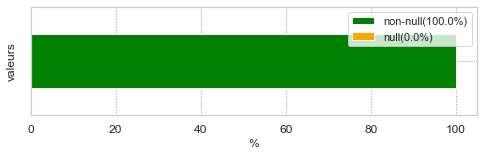

In [14]:
customers = pd.read_csv('olist_customers_dataset.csv', low_memory=low_memory)

verifier_taille(customers)
afficher_echantillon(customers)

### 1.1.3. Par Région

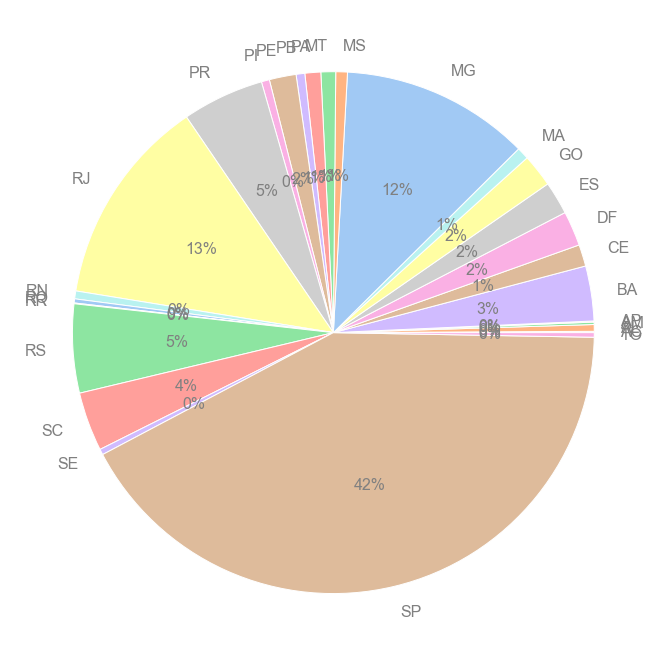

In [15]:
states = customers.groupby('customer_state').count()['customer_unique_id']

colors = sns.color_palette('pastel')
fig, ax = plt.subplots(figsize=(12, 12))
plt.pie(states, labels=states.index.tolist(), colors = colors, autopct = '%0.0f%%', textprops = {'color': 'Gray','fontsize':16})
plt.show()

Pour une meilleure visibilité et future performance, on regroupe les petite régions en une seule autre (Other).

In [16]:
customers.loc[~customers['customer_state'].isin(states.sort_values(ascending=False).iloc[:5].index), 'customer_state']='other'
customers

customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0                         14409                 franca             SP  
1                          9790  sao bernardo do campo             SP  
2                          1151              sao paulo             SP  
3                          8775        mogi das cruzes             SP  
4                         13056               campinas             SP  
...                         ...                    ...            ...  
99436                      3937              sao paulo             SP  
99437                      6764        taboao da serra             SP  
99438                     60115              fortaleza          other  
99439                     92120                 canoas             RS  
99440                      6703                  cotia             SP  

[99441 rows x 5 columns]

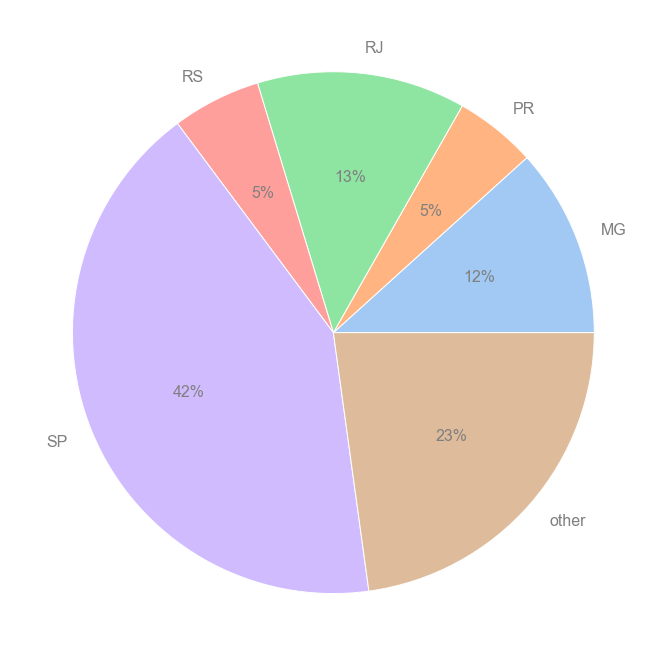

In [17]:
states = customers.groupby('customer_state').count()['customer_unique_id']

colors = sns.color_palette('pastel')
fig, ax = plt.subplots(figsize=(12, 12))
plt.pie(states, labels=states.index.tolist(), colors = colors, autopct = '%0.0f%%', textprops = {'color': 'Gray','fontsize':16})
plt.show()

### 1.1.3. Par Nombre de Commandes

In [18]:
all_customers = customers.groupby('customer_unique_id').count().sort_values(by='customer_id',ascending=False)
all_customers

customer_id  customer_zip_code_prefix  \
customer_unique_id                                                        
8d50f5eadf50201ccdcedfb9e2ac8455           17                        17   
3e43e6105506432c953e165fb2acf44c            9                         9   
6469f99c1f9dfae7733b25662e7f1782            7                         7   
ca77025e7201e3b30c44b472ff346268            7                         7   
1b6c7548a2a1f9037c1fd3ddfed95f33            7                         7   
...                                       ...                       ...   
5657dfebff5868c4dc7e8355fea865c4            1                         1   
5657596addb4d7b07b32cd330614bdf8            1                         1   
5656eb169546146caeab56c3ffc3d268            1                         1   
5656a8fabc8629ff96b2bc14f8c09a27            1                         1   
ffffd2657e2aad2907e67c3e9daecbeb            1                         1   

                                  customer_city  customer_state  
customer_unique_id                                               
8d50f5eadf50201ccdcedfb9e2ac8455             17              17  
3e43e6105506432c953e165fb2acf44c              9               9  
6469f99c1f9dfae7733b25662e7f1782              7               7  
ca77025e7201e3b30c44b472ff346268              7               7  
1b6c7548a2a1f9037c1fd3ddfed95f33              7               7  
...                                         ...             ...  
5657dfebff5868c4dc7e8355fea865c4              1               1  
5657596addb4d7b07b32cd330614bdf8              1               1  
5656eb169546146caeab56c3ffc3d268              1               1  
5656a8fabc8629ff96b2bc14f8c09a27              1               1  
ffffd2657e2aad2907e67c3e9daecbeb              1               1  

[96096 rows x 4 columns]

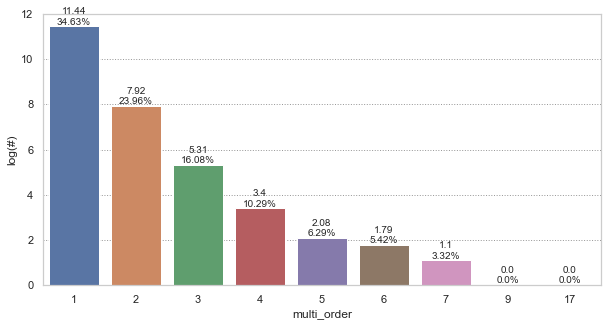

In [19]:
freq = all_customers.groupby('customer_id').count().iloc[:,0]

barplot(x=freq.index.tolist(), y=np.log(freq), ylabel='log(#)', xlabel='multi_order') # Passer au log pour une meilleure visibilité

In [20]:
frequent_customers = all_customers[all_customers['customer_id']>1]
print(round(len(frequent_customers)/len(all_customers)*100, 2), '% des cliens ont passées plus d\'une commande')

3.12 % des cliens ont passées plus d'une commande


## 1.2. Commandes

Le data set contient :
	- 99441 lignes et 8 colonnes.
	- 4908 valeurs manquantes, ce qui représente 0.62 % du data set.
Voici un sous-échantillon aléatoire :


order_id                       customer_id  \
69054  c28d64b0e65c1fc17a65f6902f11226f  eb136264e351f7e90ae306bdbbdbb44d   
64598  80e3778eb13610b0026e877f2247bb73  5b23795c3584b621ecb4efcb592c1971   

      order_status order_purchase_timestamp    order_approved_at  \
69054    delivered      2018-08-02 21:57:29  2018-08-02 22:10:12   
64598      shipped      2017-12-23 12:07:00  2017-12-23 12:18:27   

      order_delivered_carrier_date order_delivered_customer_date  \
69054          2018-08-03 13:55:00           2018-08-09 22:18:22   
64598          2018-01-02 13:15:16                           NaN   

      order_estimated_delivery_date  
69054           2018-08-13 00:00:00  
64598           2018-01-22 00:00:00

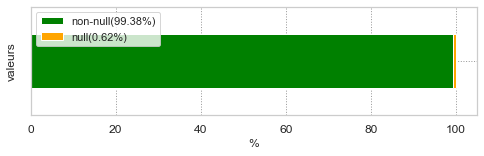

In [21]:
orders = pd.read_csv('olist_orders_dataset.csv', low_memory=low_memory)

verifier_taille(orders)
afficher_echantillon(orders)

In [22]:
# Convertir le timestamp Texte en Date
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], infer_datetime_format=True)

### 1.2.1. Par Statut

In [23]:
print('Satuts des commandes:', ', '.join(orders.order_status.unique().tolist()))

Satuts des commandes: delivered, invoiced, shipped, processing, unavailable, canceled, created, approved


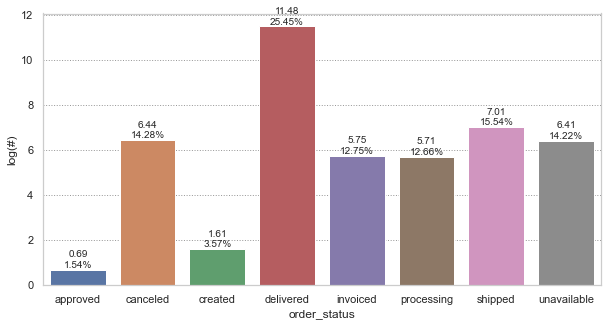

In [24]:
status = orders.groupby('order_status').count()['order_id']
status = np.log(status)

barplot(x=status.index.tolist(), y=status, ylabel='log(#)', xlabel='order_status') # Passer au log pour une meilleure visibilité

In [25]:
# Garder uniquement les commandes livrées
orders = orders[orders['order_status']=='delivered']

### 1.2.2. Evolution par Mois

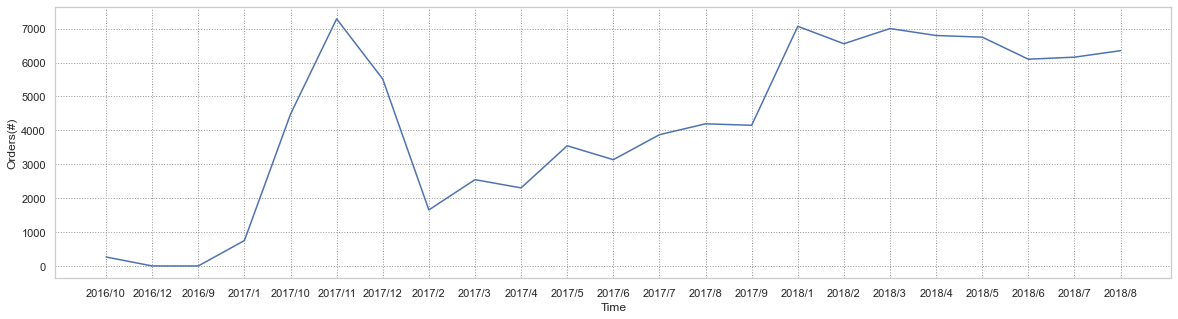

In [26]:
# Fréquence d'achats dans le temps
orders = orders[['customer_id', 'order_id', 'order_purchase_timestamp']]

orders['time'] = orders['order_purchase_timestamp'].apply(lambda x: str(x.year)+'/'+str(x.month))
orders_time = orders.groupby('time').count()['order_id']
orders = orders.drop(columns='time')

lineplot(x=orders_time.index.tolist(), y=orders_time, ylabel='Orders(#)', xlabel='Time', width=20)

À partir de la date des commandes, on déduit 3 nouvelles variables sur le comportement (fréquence) d’achat des clients dans le temps.

### 1.2.3. Par Moment du Jour

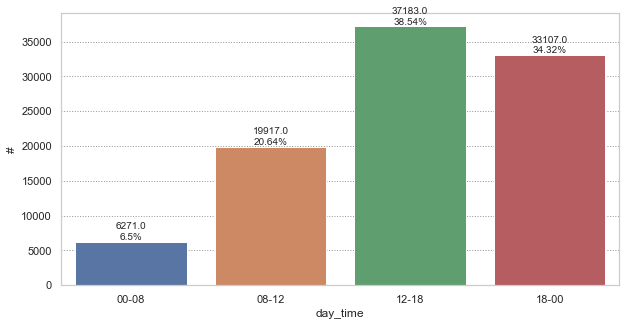

In [27]:
# Fréquence d'achats par moments du jour
orders['daytime'] = orders['order_purchase_timestamp'].dt.hour
orders['daytime'] = orders['daytime'].apply(lambda x : 0 if x>=0 and x <8 else 1 if x<12 else 2 if x<18 else 3)
orders_daytime = orders.groupby('daytime').count()['order_id']

barplot(x=['00-08', '08-12', '12-18', '18-00'], y=orders_daytime, ylabel='#', xlabel='day_time')

### 1.2.4. Par Jour de la Semaine

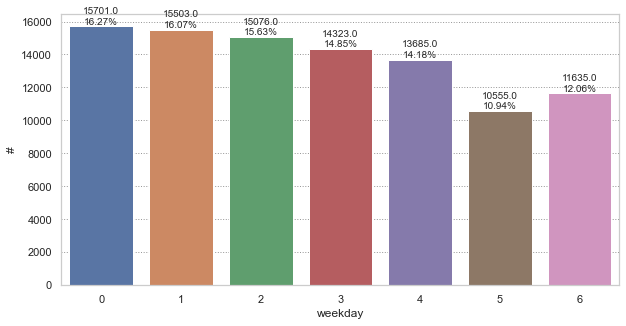

In [28]:
# Fréquence d'achats par jour de semaine
orders['weekday'] = orders['order_purchase_timestamp'].dt.weekday
orders_weekday= orders.groupby('weekday').count()['order_id']

barplot(x=orders_weekday.index.tolist(), y=orders_weekday, ylabel='#', xlabel='weekday')

### 1.2.5. Par Mois de l'Année

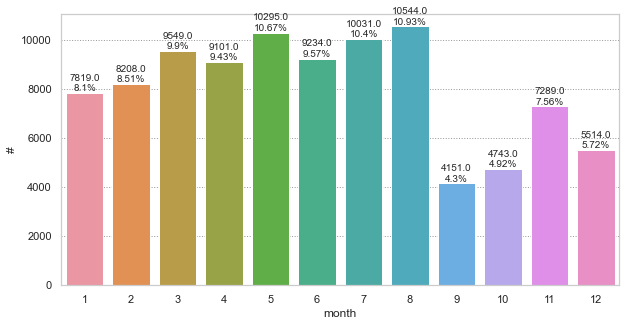

In [29]:
# Fréquence d'achats par mois de l'année
orders['month'] = orders['order_purchase_timestamp'].dt.month
orders_month= orders.groupby('month').count()['order_id']

barplot(x=orders_month.index.tolist(), y=orders_month, ylabel='#', xlabel='month')

p-value is:  4.233030316360296e-160
chi=808.810731, critical value=28.869299
At 0.05 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.


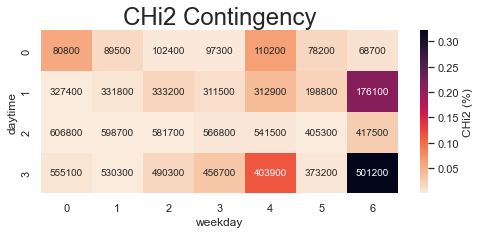

In [30]:
chi2(orders, 'daytime', 'weekday', heigth=3, width=8)

Les clients ont tendance à commander plus le vendredi soir.

### 1.2.6. Encodage Ordinal

In [31]:
for col in ['daytime', 'weekday', 'month']:
    orders = OrdinalEncoding(orders, col)
orders

customer_id                          order_id  \
0      9ef432eb6251297304e76186b10a928d  e481f51cbdc54678b7cc49136f2d6af7   
1      b0830fb4747a6c6d20dea0b8c802d7ef  53cdb2fc8bc7dce0b6741e2150273451   
2      41ce2a54c0b03bf3443c3d931a367089  47770eb9100c2d0c44946d9cf07ec65d   
3      f88197465ea7920adcdbec7375364d82  949d5b44dbf5de918fe9c16f97b45f8a   
4      8ab97904e6daea8866dbdbc4fb7aad2c  ad21c59c0840e6cb83a9ceb5573f8159   
...                                 ...                               ...   
99436  39bd1228ee8140590ac3aca26f2dfe00  9c5dedf39a927c1b2549525ed64a053c   
99437  1fca14ff2861355f6e5f14306ff977a7  63943bddc261676b46f01ca7ac2f7bd8   
99438  1aa71eb042121263aafbe80c1b562c9c  83c1379a015df1e13d02aae0204711ab   
99439  b331b74b18dc79bcdf6532d51e1637c1  11c177c8e97725db2631073c19f07b62   
99440  edb027a75a1449115f6b43211ae02a24  66dea50a8b16d9b4dee7af250b4be1a5   

      order_purchase_timestamp  daytime  weekday  month  
0          2017-10-02 10:56:33      1.0      6.0    1.0  
1          2018-07-24 20:41:37      2.0      5.0    9.0  
2          2018-08-08 08:38:49      1.0      4.0   11.0  
3          2017-11-18 19:28:06      2.0      0.0    3.0  
4          2018-02-13 21:18:39      2.0      5.0    5.0  
...                        ...      ...      ...    ...  
99436      2017-03-09 09:54:05      1.0      3.0    8.0  
99437      2018-02-06 12:58:58      3.0      5.0    5.0  
99438      2017-08-27 14:46:43      3.0      1.0   11.0  
99439      2018-01-08 21:28:27      2.0      6.0    4.0  
99440      2018-03-08 20:57:30      2.0      3.0    8.0  

[96478 rows x 6 columns]

### 1.2.7. Jointure : <em>df = Clients (Région) X Commmandes (Temps)</em>

In [32]:
df = pd.merge(customers[['customer_unique_id', 'customer_id', 'customer_state']], orders, how='inner', on=['customer_id']).drop(columns='customer_id')
print('Doublons :', len(doublons(df['order_id'])))
df

Doublons : 0


customer_unique_id customer_state  \
0      861eff4711a542e4b93843c6dd7febb0             SP   
1      290c77bc529b7ac935b93aa66c333dc3             SP   
2      060e732b5b29e8181a18229c7b0b2b5e             SP   
3      259dac757896d24d7702b9acbbff3f3c             SP   
4      345ecd01c38d18a9036ed96c73b8d066             SP   
...                                 ...            ...   
96473  1a29b476fee25c95fbafc67c5ac95cf8             SP   
96474  d52a67c98be1cf6a5c84435bd38d095d             SP   
96475  e9f50caf99f032f0bf3c55141f019d99          other   
96476  73c2643a0a458b49f58cea58833b192e             RS   
96477  84732c5050c01db9b23e19ba39899398             SP   

                               order_id order_purchase_timestamp  daytime  \
0      00e7ee1b050b8499577073aeb2a297a1      2017-05-16 15:05:35      3.0   
1      29150127e6685892b6eab3eec79f59c7      2018-01-12 20:48:24      2.0   
2      b2059ed67ce144a36e2aa97d2c9e9ad2      2018-05-19 16:07:45      3.0   
3      951670f92359f4fe4a63112aa7306eba      2018-03-13 16:06:38      3.0   
4      6b7d50bd145f6fc7f33cebabd7e49d0f      2018-07-29 09:51:30      1.0   
...                                 ...                      ...      ...   
96473  6760e20addcf0121e9d58f2f1ff14298      2018-04-07 15:48:17      3.0   
96474  9ec0c8947d973db4f4e8dcf1fbfa8f1b      2018-04-04 08:20:22      1.0   
96475  fed4434add09a6f332ea398efd656a5c      2018-04-08 20:11:50      2.0   
96476  e31ec91cea1ecf97797787471f98a8c2      2017-11-03 21:08:33      2.0   
96477  28db69209a75e59f20ccbb5c36a20b90      2017-12-19 14:27:23      3.0   

       weekday  month  
0          5.0   10.0  
1          2.0    4.0  
2          0.0   10.0  
3          5.0    8.0  
4          1.0    9.0  
...        ...    ...  
96473      0.0    6.0  
96474      4.0    6.0  
96475      1.0    6.0  
96476      2.0    3.0  
96477      5.0    2.0  

[96478 rows x 7 columns]

## 1.3. Produits (Commandés & Catalogue)

Le data set contient :
	- 112650 lignes et 7 colonnes.
	- 0 valeurs manquantes, ce qui représente 0.0 % du data set.
Voici un sous-échantillon aléatoire :


order_id  order_item_id  \
108998  f7adb52b8785594c7e357054489e371a              1   
50675   733abca4b3372182a6c955ed064b0929              1   

                              product_id                         seller_id  \
108998  c9dbe2eec19a8093cb5ac57486531c18  cca3071e3e9bb7d12640c9fbe2301306   
50675   f5131289ca7eab9700015f6e8bfa8e41  4125d9385a25e82d2f72d3a0fd55bc3f   

        shipping_limit_date  price  freight_value  
108998  2018-04-12 20:10:22   96.9          23.26  
50675   2018-08-07 16:44:08   42.9          18.40

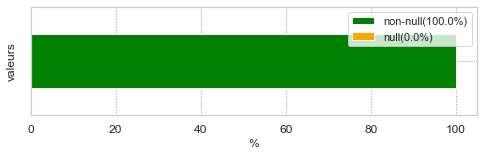

In [33]:
# Produits commandés
order_items = pd.read_csv('olist_order_items_dataset.csv', low_memory=low_memory)

verifier_taille(order_items)
afficher_echantillon(order_items)

### 1.3.1. Volume des commandes

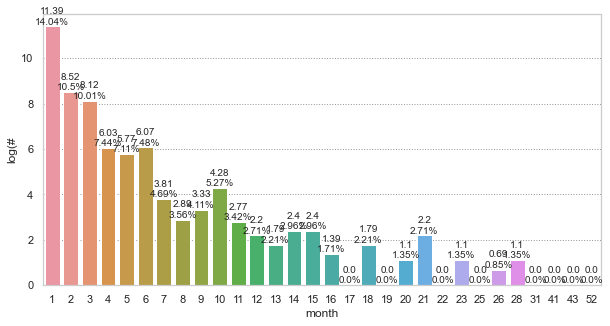

In [34]:
orders_volume = order_items[['order_id', 'product_id', 'order_item_id']].groupby(['order_id', 'product_id']).max().reset_index(level=0)
orders_volume = orders_volume[['order_id', 'order_item_id']].groupby(['order_id']).sum().reset_index(level=0)
orders_volume = renameCol(orders_volume, 'order_item_id', 'orders_volume')
orders_volume
volumes = orders_volume.groupby(by='orders_volume').count()['order_id']
barplot(x=volumes.index.tolist(), y=np.log(volumes), ylabel='log(#', xlabel='month') # Passer au log pour une meilleure visibilité

Le data set contient :
	- 32951 lignes et 9 colonnes.
	- 2448 valeurs manquantes, ce qui représente 0.83 % du data set.
Voici un sous-échantillon aléatoire :


product_id product_category_name  \
19487  cc6a0d67ea3d63acca23c81500670843     artigos_de_festas   
6931   3b88c6a09d4f61f0566c39ed139fb5e2              pet_shop   

       product_name_lenght  product_description_lenght  product_photos_qty  \
19487                 46.0                       459.0                 1.0   
6931                  38.0                       497.0                 2.0   

       product_weight_g  product_length_cm  product_height_cm  \
19487            1350.0               23.0               17.0   
6931              300.0               20.0               20.0   

       product_width_cm  
19487              18.0  
6931               20.0

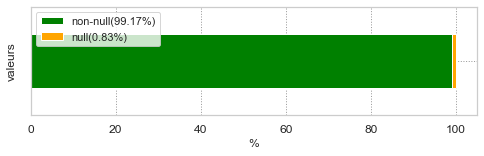

In [35]:
# Catalogue des produits
products = pd.read_csv('olist_products_dataset.csv', low_memory=low_memory)

verifier_taille(products)
afficher_echantillon(products)

Le catalogue des produits contient quelques valeurs manquantes, on élimine les produits incomplets.

In [36]:
products = products[products['product_category_name'].notna()]

### 1.3.2. Catégories de Produits

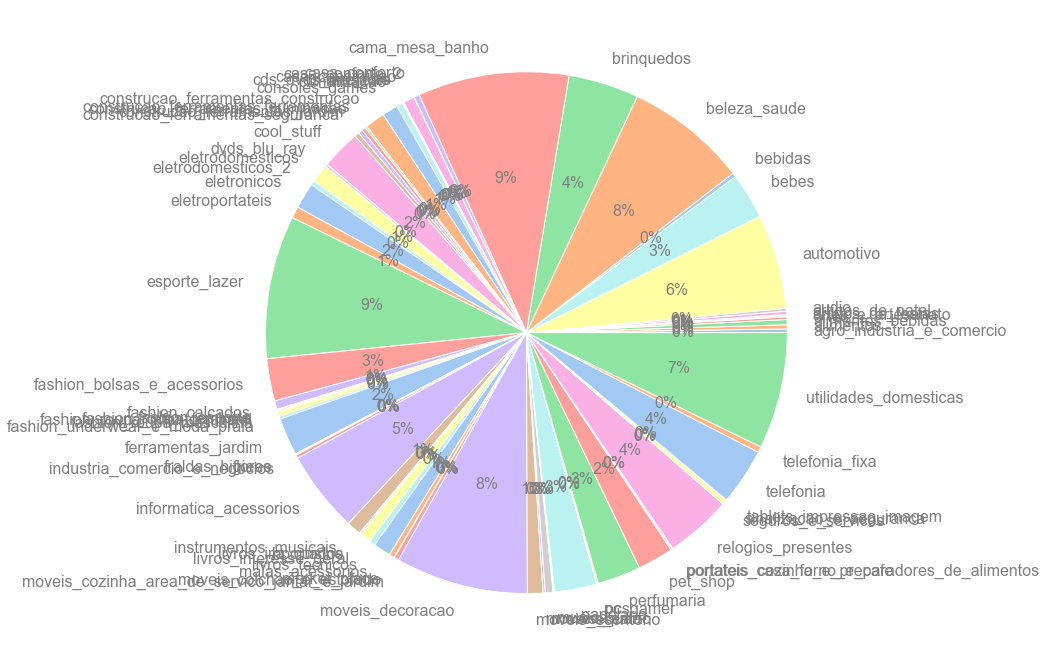

In [37]:
# Le nombre de produits par catégorie
products_categ= products.groupby('product_category_name').count()['product_id']

colors = sns.color_palette('pastel')
fig, ax = plt.subplots(figsize=(12, 12))
plt.pie(products_categ, labels=products_categ.index.tolist(), colors = colors, autopct = '%0.0f%%', textprops = {'color': 'Gray','fontsize':16})
plt.show()

### 1.3.3. Jointure : <em>Produits = Produits Commandés X Catalogue (Catégories)</em>

In [38]:
order_items = pd.merge(order_items, products[['product_id', 'product_category_name']], how='inner', on=['product_id'])
order_items

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       130898c0987d1801452a8ed92a670612              1   
2       532ed5e14e24ae1f0d735b91524b98b9              1   
3       6f8c31653edb8c83e1a739408b5ff750              1   
4       7d19f4ef4d04461989632411b7e588b9              1   
...                                  ...            ...   
111042  ffebd80e3291e811c308365936897efd              1   
111043  ffee31fb4b5e35c9123608015637c495              1   
111044  fff7c4452f050315db1b3f24d9df5fcd              1   
111045  fffa82886406ccf10c7b4e35c4ff2788              1   
111046  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
2       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
3       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
4       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
...                                  ...                               ...   
111042  4cc4d02efc8f249c13355147fb44e34d  d1c7fa84e48cfa21a0e595167c1c500e   
111043  b10ecf8e33aaaea419a9fa860ea80fb5  0241d4d5d36f10f80c644447315af0bd   
111044  dd469c03ad67e201bc2179ef077dcd48  7e93a43ef30c4f03f38b393420bc753a   
111045  bbe7651fef80287a816ead73f065fc4b  8f2ce03f928b567e3d56181ae20ae952   
111046  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date  price  freight_value product_category_name  
0       2017-09-19 09:45:35   58.9          13.29            cool_stuff  
1       2017-07-05 02:44:11   55.9          17.96            cool_stuff  
2       2018-05-23 10:56:25   64.9          18.33            cool_stuff  
3       2017-08-07 18:55:08   58.9          16.17            cool_stuff  
4       2017-08-16 22:05:11   58.9          13.29            cool_stuff  
...                     ...    ...            ...                   ...  
111042  2018-07-18 20:23:55  129.9          51.20    ferramentas_jardim  
111043  2018-08-21 10:10:11   99.0          13.52      moveis_decoracao  
111044  2017-06-07 17:05:23  736.0          20.91    relogios_presentes  
111045  2017-12-22 17:31:42  229.9          44.02         esporte_lazer  
111046  2018-06-12 17:10:13   43.0          12.79       cama_mesa_banho  

[111047 rows x 8 columns]

### 1.3.4. Montants total des Commmandes

In [39]:
order_prices = order_items[['order_id','price', 'freight_value']].groupby('order_id').sum().reset_index(level=0)
order_prices = pd.merge(order_prices, order_items.loc[order_items['order_item_id']==1,['order_id', 'product_category_name']], how='inner', on=['order_id'])
order_prices.sort_values(by='price', ascending=False)

order_id     price  freight_value  \
1432   03caa2c082116e1d31e67e9ae3700499  13440.00         224.08   
43827  736e1922ae60d0d6a89247b851902527   7160.00         114.88   
3087   0812eb902a67711a1cb742b3cdaa65ae   6735.00         194.31   
96887  fefacc66af859508bf1a7934eab1e97f   6729.00         193.21   
93081  f5136e38d1a14a4dbd87dff67da82701   6499.00         227.66   
...                                 ...       ...            ...   
21475  38bcb524e1c38c2c1b60600a80fc8999      2.90           8.72   
88475  e8bbc1d69fee39eee4c72cb5c969e39d      2.29           7.78   
91871  f1d5c2e6867fa93ceee9ef9b34a53cbf      2.20           7.39   
41956  6e864b3f0ec71031117ad4cf46b7f2a1      0.85          18.23   
23816  3ee6513ae7ea23bdfab5b9ab60bffcb5      0.85          18.23   

                   product_category_name  
1432                      telefonia_fixa  
43827                     telefonia_fixa  
3087               utilidades_domesticas  
96887                                pcs  
93081                              artes  
...                                  ...  
21475                           pet_shop  
88475                          papelaria  
91871                       beleza_saude  
41956  construcao_ferramentas_construcao  
23816  construcao_ferramentas_construcao  

[97250 rows x 4 columns]

### 1.3.5. Jointure : <em>df = df X Montants X Volumes</em>

In [40]:
df = pd.merge(df, order_prices, how='inner', on=['order_id'])
df = pd.merge(df, orders_volume, how='inner', on=['order_id'])
print('Doublons :', len(doublons(df['order_id'])))
df

Doublons : 0


customer_unique_id customer_state  \
0      861eff4711a542e4b93843c6dd7febb0             SP   
1      290c77bc529b7ac935b93aa66c333dc3             SP   
2      060e732b5b29e8181a18229c7b0b2b5e             SP   
3      259dac757896d24d7702b9acbbff3f3c             SP   
4      345ecd01c38d18a9036ed96c73b8d066             SP   
...                                 ...            ...   
95114  1a29b476fee25c95fbafc67c5ac95cf8             SP   
95115  d52a67c98be1cf6a5c84435bd38d095d             SP   
95116  e9f50caf99f032f0bf3c55141f019d99          other   
95117  73c2643a0a458b49f58cea58833b192e             RS   
95118  84732c5050c01db9b23e19ba39899398             SP   

                               order_id order_purchase_timestamp  daytime  \
0      00e7ee1b050b8499577073aeb2a297a1      2017-05-16 15:05:35      3.0   
1      29150127e6685892b6eab3eec79f59c7      2018-01-12 20:48:24      2.0   
2      b2059ed67ce144a36e2aa97d2c9e9ad2      2018-05-19 16:07:45      3.0   
3      951670f92359f4fe4a63112aa7306eba      2018-03-13 16:06:38      3.0   
4      6b7d50bd145f6fc7f33cebabd7e49d0f      2018-07-29 09:51:30      1.0   
...                                 ...                      ...      ...   
95114  6760e20addcf0121e9d58f2f1ff14298      2018-04-07 15:48:17      3.0   
95115  9ec0c8947d973db4f4e8dcf1fbfa8f1b      2018-04-04 08:20:22      1.0   
95116  fed4434add09a6f332ea398efd656a5c      2018-04-08 20:11:50      2.0   
95117  e31ec91cea1ecf97797787471f98a8c2      2017-11-03 21:08:33      2.0   
95118  28db69209a75e59f20ccbb5c36a20b90      2017-12-19 14:27:23      3.0   

       weekday  month   price  freight_value   product_category_name  \
0          5.0   10.0  124.99          21.88       moveis_escritorio   
1          2.0    4.0  289.00          46.48   utilidades_domesticas   
2          0.0   10.0  139.94          17.79       moveis_escritorio   
3          5.0    8.0  149.94          23.36       moveis_escritorio   
4          1.0    9.0  230.00          22.25           casa_conforto   
...        ...    ...     ...            ...                     ...   
95114      0.0    6.0   74.90          13.88  livros_interesse_geral   
95115      4.0    6.0  114.90          14.16           esporte_lazer   
95116      1.0    6.0   37.00          19.04            beleza_saude   
95117      2.0    3.0  689.00          22.07      relogios_presentes   
95118      5.0    2.0   13.99           7.78              perfumaria   

       orders_volume  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
...              ...  
95114              1  
95115              1  
95116              1  
95117              1  
95118              1  

[95119 rows x 11 columns]

In [41]:
# Le nombre de commandes par catégorie
orders_categ= df.groupby('product_category_name').sum()['orders_volume']
categ = pd.merge(products_categ, orders_categ, how='inner', on=['product_category_name'])

# Le montant total des commandes par catégorie
orders_categ= df.groupby('product_category_name').sum()['price']
categ = pd.merge(categ, orders_categ, how='inner', on=['product_category_name'])
categ

product_id  orders_volume      price
product_category_name                                          
agro_industria_e_comercio          74            210   70566.10
alimentos                          82            498   28354.39
alimentos_bebidas                 104            280   14873.57
artes                              55            197   23233.13
artes_e_artesanato                 19             26    1804.92
...                               ...            ...        ...
sinalizacao_e_seguranca            93            206   21394.95
tablets_impressao_imagem            9             83    7382.41
telefonia                        1134           4531  310120.25
telefonia_fixa                    116            259   55394.69
utilidades_domesticas            2335           7102  616750.91

[73 rows x 3 columns]

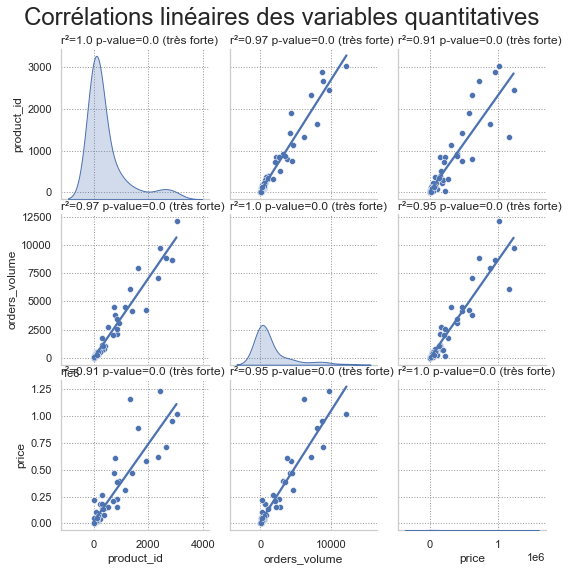

In [42]:
afficher_correlations(categ)

La distribution des catégories de produits dans le catalogue est corrélée à la distribution et aux montants des catégories de produits commandés.

## 1.4. Paiements

In [43]:
order_payments = pd.read_csv('olist_order_payments_dataset.csv', low_memory=low_memory)
order_payments

order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value  
0                          8          99.33  
1                          1          24.39  
2                          1          65.71  
3                          8         107.78  
4                          2         128.45  
...                      ...            ...  
103881                     1         363.31  
103882                     2          96.80  
103883                     1          47.77  
103884                     5         369.54  
103885                     1         191.58  

[103886 rows x 5 columns]

In [44]:
# Grouper les paiements par commandes
payments = order_payments[['order_id', 'payment_sequential', 'payment_installments', 'payment_value']].groupby('order_id').agg({'payment_sequential':'max', 'payment_installments': 'max', 'payment_value': 'sum'}).reset_index(level=0)
payments.sort_values('payment_sequential', ascending=False)

order_id  payment_sequential  \
97261  fa65dad1b0e818e3ccc5cb0e39231352                  29   
79611  ccf804e764ed5650cd8759557269dc13                  26   
15577  285c2e15bebd4ac83635ccc563dc71f4                  22   
53168  895ab968e7bb0d5659d16cd74cd1650c                  21   
92724  ee9ca989fc93ba09a6eddc250ce01742                  19   
...                                 ...                 ...   
33713  56ca2955a23551796d37da2e384c7139                   1   
33712  56c9b97f31031c70ffb000219dc6f403                   1   
33711  56c93a3f93a1e7eb24ed51a6931dc488                   1   
33710  56c898abec8a6fd5e84ffc42904c4f65                   1   
99439  fffe41c64501cc87c801fd61db3f6244                   1   

       payment_installments  payment_value  
97261                     1         457.99  
79611                     1          62.68  
15577                     1          40.85  
53168                     1         161.32  
92724                     1          82.73  
...                     ...            ...  
33713                     1          30.10  
33712                     8         163.81  
33711                     1         933.70  
33710                    10         478.33  
99439                     1          55.79  

[99440 rows x 4 columns]

### 1.4.1. Echelons de Paiements

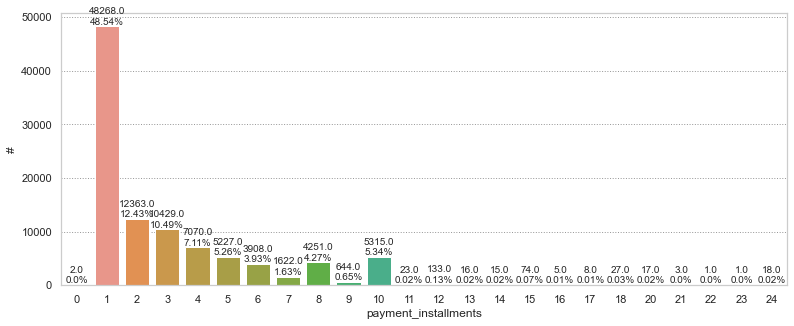

In [45]:
payment_installments = payments.groupby('payment_installments').count()['order_id']
barplot(x=payment_installments.index.tolist(), y=payment_installments, ylabel='#', xlabel='payment_installments', width=13)

L’<strong>échelon 0</strong> est une anomalie. On identifie les commandes correspondantes et les corrige.

In [46]:
payments.loc[payments['payment_installments']==0, :]

order_id  payment_sequential  \
10244  1a57108394169c0b47d8f876acc9ba2d                   2   
45168  744bade1fcf9ff3f31d860ace076d422                   2   

       payment_installments  payment_value  
10244                     0         129.94  
45168                     0          58.69

In [47]:
payments.loc[payments['payment_installments']==0, 'payment_installments'] = 1

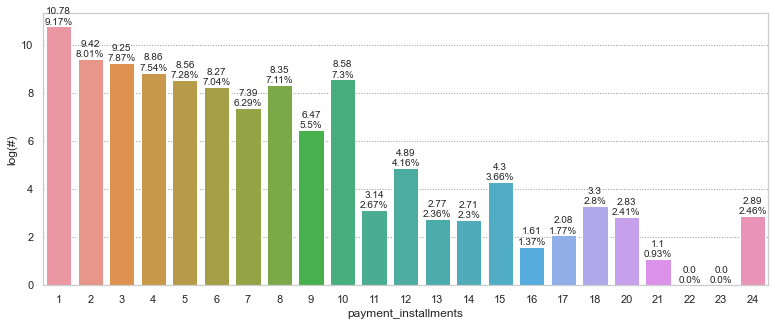

In [48]:
payment_installments = payments.groupby('payment_installments').count()['order_id']
barplot(x=payment_installments.index.tolist(), y=np.log(payment_installments), ylabel='log(#)', xlabel='payment_installments', width=13) # Passer au log pour une meilleure visibilité

### 1.4.2. Tranches de Paiements

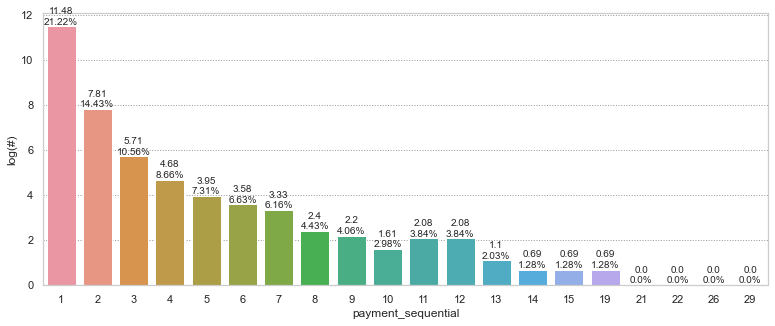

In [49]:
payment_sequential = payments.groupby('payment_sequential').count()['order_id']
barplot(x=payment_sequential.index.tolist(), y=np.log(payment_sequential), ylabel='log(#)', xlabel='payment_sequential', width=13) # Passer au log pour une meilleure visibilité

### 1.4.3. Types de Paiements

In [50]:
payment_type = order_payments[['order_id','payment_type']].drop_duplicates(subset='order_id')
payment_type

order_id payment_type
0       b81ef226f3fe1789b1e8b2acac839d17  credit_card
1       a9810da82917af2d9aefd1278f1dcfa0  credit_card
2       25e8ea4e93396b6fa0d3dd708e76c1bd  credit_card
3       ba78997921bbcdc1373bb41e913ab953  credit_card
4       42fdf880ba16b47b59251dd489d4441a  credit_card
...                                  ...          ...
103881  0406037ad97740d563a178ecc7a2075c       boleto
103882  7b905861d7c825891d6347454ea7863f  credit_card
103883  32609bbb3dd69b3c066a6860554a77bf  credit_card
103884  b8b61059626efa996a60be9bb9320e10  credit_card
103885  28bbae6599b09d39ca406b747b6632b1       boleto

[99440 rows x 2 columns]

In [52]:
print('Types de paiements:', ', '.join(payment_type['payment_type'].unique().tolist()))

Types de paiements: credit_card, boleto, voucher, debit_card, not_defined


Eliminer les commandes dont le mode de paiement est indéfini.

In [53]:
payment_type[payment_type['payment_type']=='not_defined']

order_id payment_type
51280  4637ca194b6387e2d538dc89b124b0ee  not_defined
57411  00b1cb0320190ca0daa2c88b35206009  not_defined
94427  c8c528189310eaa44a745b8d9d26908b  not_defined

In [54]:
payment_type = payment_type[payment_type['payment_type']!='not_defined']

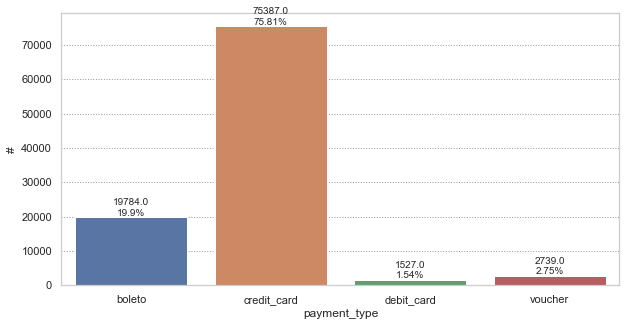

In [55]:
ptypes = payment_type.groupby('payment_type').count()['order_id']
ptypes_name = ptypes.index.tolist()

barplot(x=ptypes_name, y=ptypes, ylabel='#', xlabel='payment_type')

### 1.4.4. Jointure : <em>df = df X Paiements (Echelons X Tranches X Types)</em>

In [56]:
df = pd.merge(df, payments, how='inner', on=['order_id'])
df = pd.merge(df, payment_type, how='inner', on=['order_id'])
df = df.drop(columns=['price', 'freight_value'])
print('Doublons :', len(doublons(df['order_id'])))
df

Doublons : 0


customer_unique_id customer_state  \
0      861eff4711a542e4b93843c6dd7febb0             SP   
1      290c77bc529b7ac935b93aa66c333dc3             SP   
2      060e732b5b29e8181a18229c7b0b2b5e             SP   
3      259dac757896d24d7702b9acbbff3f3c             SP   
4      345ecd01c38d18a9036ed96c73b8d066             SP   
...                                 ...            ...   
95113  1a29b476fee25c95fbafc67c5ac95cf8             SP   
95114  d52a67c98be1cf6a5c84435bd38d095d             SP   
95115  e9f50caf99f032f0bf3c55141f019d99          other   
95116  73c2643a0a458b49f58cea58833b192e             RS   
95117  84732c5050c01db9b23e19ba39899398             SP   

                               order_id order_purchase_timestamp  daytime  \
0      00e7ee1b050b8499577073aeb2a297a1      2017-05-16 15:05:35      3.0   
1      29150127e6685892b6eab3eec79f59c7      2018-01-12 20:48:24      2.0   
2      b2059ed67ce144a36e2aa97d2c9e9ad2      2018-05-19 16:07:45      3.0   
3      951670f92359f4fe4a63112aa7306eba      2018-03-13 16:06:38      3.0   
4      6b7d50bd145f6fc7f33cebabd7e49d0f      2018-07-29 09:51:30      1.0   
...                                 ...                      ...      ...   
95113  6760e20addcf0121e9d58f2f1ff14298      2018-04-07 15:48:17      3.0   
95114  9ec0c8947d973db4f4e8dcf1fbfa8f1b      2018-04-04 08:20:22      1.0   
95115  fed4434add09a6f332ea398efd656a5c      2018-04-08 20:11:50      2.0   
95116  e31ec91cea1ecf97797787471f98a8c2      2017-11-03 21:08:33      2.0   
95117  28db69209a75e59f20ccbb5c36a20b90      2017-12-19 14:27:23      3.0   

       weekday  month   product_category_name  orders_volume  \
0          5.0   10.0       moveis_escritorio              1   
1          2.0    4.0   utilidades_domesticas              1   
2          0.0   10.0       moveis_escritorio              1   
3          5.0    8.0       moveis_escritorio              1   
4          1.0    9.0           casa_conforto              1   
...        ...    ...                     ...            ...   
95113      0.0    6.0  livros_interesse_geral              1   
95114      4.0    6.0           esporte_lazer              1   
95115      1.0    6.0            beleza_saude              1   
95116      2.0    3.0      relogios_presentes              1   
95117      5.0    2.0              perfumaria              1   

       payment_sequential  payment_installments  payment_value payment_type  
0                       1                     2         146.87  credit_card  
1                       1                     8         335.48  credit_card  
2                       1                     7         157.73  credit_card  
3                       1                     1         173.30  credit_card  
4                       1                     8         252.25  credit_card  
...                   ...                   ...            ...          ...  
95113                   1                     6          88.78  credit_card  
95114                   1                     3         129.06  credit_card  
95115                   1                     5          56.04  credit_card  
95116                   1                     2         711.07  credit_card  
95117                   1                     1          21.77  credit_card  

[95118 rows x 13 columns]

## 1.5. Reviews

In [57]:
reviews = pd.read_csv('olist_order_reviews_dataset.csv', low_memory=low_memory)
print('Doublons :', len(doublons(reviews['order_id'])))

# Grouper les reviews par commandes
reviews = reviews[['order_id', 'review_score']].groupby('order_id').mean().reset_index(level=0)
print('Doublons :', len(doublons(reviews['order_id'])))
reviews

Doublons : 551
Doublons : 0


order_id  review_score
0      00010242fe8c5a6d1ba2dd792cb16214           5.0
1      00018f77f2f0320c557190d7a144bdd3           4.0
2      000229ec398224ef6ca0657da4fc703e           5.0
3      00024acbcdf0a6daa1e931b038114c75           4.0
4      00042b26cf59d7ce69dfabb4e55b4fd9           5.0
...                                 ...           ...
98668  fffc94f6ce00a00581880bf54a75a037           5.0
98669  fffcd46ef2263f404302a634eb57f7eb           5.0
98670  fffce4705a9662cd70adb13d4a31832d           5.0
98671  fffe18544ffabc95dfada21779c9644f           5.0
98672  fffe41c64501cc87c801fd61db3f6244           5.0

[98673 rows x 2 columns]

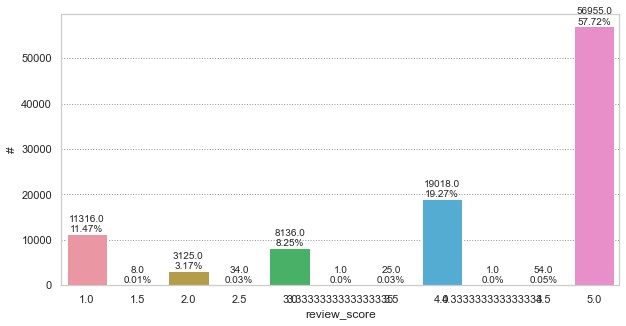

In [58]:
review_scores = reviews.groupby('review_score').count().iloc[:,0]
barplot(x=review_scores.index.tolist(), y=review_scores, ylabel='#', xlabel='review_score')

Le groupement des reviews a créé des valeurs réelles, on les arrondi.

In [59]:
reviews['review_score'] = reviews['review_score'].astype(int)

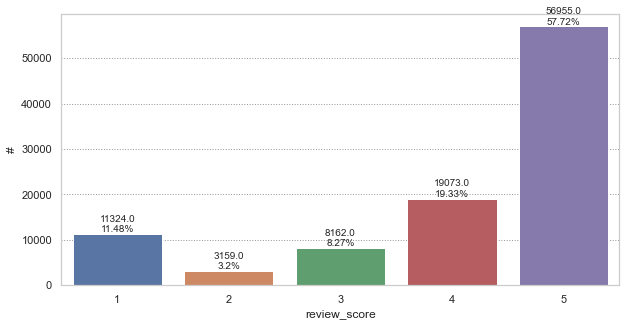

In [60]:
review_scores = reviews.groupby('review_score').count().iloc[:,0]
barplot(x=review_scores.index.tolist(), y=review_scores, ylabel='#', xlabel='review_score')

### 1.5.1. Jointure : <em>df = df X Reviews (Score)</em>

In [61]:
df = pd.merge(df, reviews[['order_id', 'review_score']], how='inner', on=['order_id'])
print('Doublons :', len(doublons(df['order_id'])))
df

Doublons : 0


customer_unique_id customer_state  \
0      861eff4711a542e4b93843c6dd7febb0             SP   
1      290c77bc529b7ac935b93aa66c333dc3             SP   
2      060e732b5b29e8181a18229c7b0b2b5e             SP   
3      259dac757896d24d7702b9acbbff3f3c             SP   
4      345ecd01c38d18a9036ed96c73b8d066             SP   
...                                 ...            ...   
94476  1a29b476fee25c95fbafc67c5ac95cf8             SP   
94477  d52a67c98be1cf6a5c84435bd38d095d             SP   
94478  e9f50caf99f032f0bf3c55141f019d99          other   
94479  73c2643a0a458b49f58cea58833b192e             RS   
94480  84732c5050c01db9b23e19ba39899398             SP   

                               order_id order_purchase_timestamp  daytime  \
0      00e7ee1b050b8499577073aeb2a297a1      2017-05-16 15:05:35      3.0   
1      29150127e6685892b6eab3eec79f59c7      2018-01-12 20:48:24      2.0   
2      b2059ed67ce144a36e2aa97d2c9e9ad2      2018-05-19 16:07:45      3.0   
3      951670f92359f4fe4a63112aa7306eba      2018-03-13 16:06:38      3.0   
4      6b7d50bd145f6fc7f33cebabd7e49d0f      2018-07-29 09:51:30      1.0   
...                                 ...                      ...      ...   
94476  6760e20addcf0121e9d58f2f1ff14298      2018-04-07 15:48:17      3.0   
94477  9ec0c8947d973db4f4e8dcf1fbfa8f1b      2018-04-04 08:20:22      1.0   
94478  fed4434add09a6f332ea398efd656a5c      2018-04-08 20:11:50      2.0   
94479  e31ec91cea1ecf97797787471f98a8c2      2017-11-03 21:08:33      2.0   
94480  28db69209a75e59f20ccbb5c36a20b90      2017-12-19 14:27:23      3.0   

       weekday  month   product_category_name  orders_volume  \
0          5.0   10.0       moveis_escritorio              1   
1          2.0    4.0   utilidades_domesticas              1   
2          0.0   10.0       moveis_escritorio              1   
3          5.0    8.0       moveis_escritorio              1   
4          1.0    9.0           casa_conforto              1   
...        ...    ...                     ...            ...   
94476      0.0    6.0  livros_interesse_geral              1   
94477      4.0    6.0           esporte_lazer              1   
94478      1.0    6.0            beleza_saude              1   
94479      2.0    3.0      relogios_presentes              1   
94480      5.0    2.0              perfumaria              1   

       payment_sequential  payment_installments  payment_value payment_type  \
0                       1                     2         146.87  credit_card   
1                       1                     8         335.48  credit_card   
2                       1                     7         157.73  credit_card   
3                       1                     1         173.30  credit_card   
4                       1                     8         252.25  credit_card   
...                   ...                   ...            ...          ...   
94476                   1                     6          88.78  credit_card   
94477                   1                     3         129.06  credit_card   
94478                   1                     5          56.04  credit_card   
94479                   1                     2         711.07  credit_card   
94480                   1                     1          21.77  credit_card   

       review_score  
0                 4  
1                 5  
2                 5  
3                 5  
4                 5  
...             ...  
94476             4  
94477             5  
94478             1  
94479             5  
94480             5  

[94481 rows x 14 columns]

In [62]:
print('Doublons :', len(doublons(df['customer_unique_id'])))

Doublons : 3005


## 1.6. Agrégation par Client & Transformation

### 1.6.1. Récence des Commandes [<em>Freshness(R)</em>]

In [63]:
# Sauvgarde des dates des commandes les plus récentes par client
orders_freshness = df.groupby('customer_unique_id').max().reset_index(level=0)[['customer_unique_id', 'order_purchase_timestamp']]
orders_freshness['timestamp'] = orders_freshness['order_purchase_timestamp']
orders_freshness['order_purchase_timestamp']= MinMax_Scaled(pd.DataFrame(orders_freshness['order_purchase_timestamp']))
orders_freshness

customer_unique_id  order_purchase_timestamp  \
0      0000366f3b9a7992bf8c76cfdf3221e2                  0.840025   
1      0000b849f77a49e4a4ce2b2a4ca5be3f                  0.835723   
2      0000f46a3911fa3c0805444483337064                  0.227613   
3      0000f6ccb0745a6a4b88665a16c9f078                  0.538405   
4      0004aac84e0df4da2b147fca70cf8255                  0.585848   
...                                 ...                       ...   
91471  fffcf5a5ff07b0908bd4e2dbc735a684                  0.357120   
91472  fffea47cd6d3cc0a88bd621562a9d061                  0.623285   
91473  ffff371b4d645b6ecea244b27531430a                  0.182688   
91474  ffff5962728ec6157033ef9805bacc48                  0.828774   
91475  ffffd2657e2aad2907e67c3e9daecbeb                  0.303834   

                timestamp  
0     2018-05-10 10:56:27  
1     2018-05-07 11:11:27  
2     2017-03-10 21:05:03  
3     2017-10-12 20:29:41  
4     2017-11-14 19:45:42  
...                   ...  
91471 2017-06-08 21:00:36  
91472 2017-12-10 20:07:56  
91473 2017-02-07 15:49:16  
91474 2018-05-02 15:17:41  
91475 2017-05-02 20:18:45  

[91476 rows x 3 columns]

### 1.6.2. Agrégation (somme) : <em>dfe</em>

In [64]:
# Agregation des infos clients avec la somme
dfe = df.groupby('customer_unique_id').sum().reset_index(level=0)
dfe

customer_unique_id  daytime  weekday  month  \
0      0000366f3b9a7992bf8c76cfdf3221e2      1.0      3.0   10.0   
1      0000b849f77a49e4a4ce2b2a4ca5be3f      1.0      6.0   10.0   
2      0000f46a3911fa3c0805444483337064      2.0      2.0    8.0   
3      0000f6ccb0745a6a4b88665a16c9f078      2.0      3.0    1.0   
4      0004aac84e0df4da2b147fca70cf8255      2.0      5.0    3.0   
...                                 ...      ...      ...    ...   
91471  fffcf5a5ff07b0908bd4e2dbc735a684      2.0      3.0    7.0   
91472  fffea47cd6d3cc0a88bd621562a9d061      2.0      1.0    2.0   
91473  ffff371b4d645b6ecea244b27531430a      3.0      5.0    5.0   
91474  ffff5962728ec6157033ef9805bacc48      3.0      4.0   10.0   
91475  ffffd2657e2aad2907e67c3e9daecbeb      2.0      5.0   10.0   

       orders_volume  payment_sequential  payment_installments  payment_value  \
0                  1                   1                     8         141.90   
1                  1                   1                     1          27.19   
2                  1                   1                     8          86.22   
3                  1                   1                     4          43.62   
4                  1                   1                     6         196.89   
...              ...                 ...                   ...            ...   
91471              3                   1                    10        2067.42   
91472              1                   1                     1          84.58   
91473              1                   1                     1         112.46   
91474              1                   1                     5         133.69   
91475              1                   1                     4          71.56   

       review_score  
0                 5  
1                 4  
2                 3  
3                 4  
4                 5  
...             ...  
91471             5  
91472             4  
91473             5  
91474             5  
91475             5  

[91476 rows x 9 columns]

### 1.6.3. Fréquence des Commandes [<em>Multi_Order(F)</em>]

In [65]:
# Fréquence des commandes
multi_orders = df.groupby('customer_unique_id').count().reset_index(level=0)[['customer_unique_id', 'order_id']]
multi_orders = renameCol(multi_orders, 'order_id', 'multi_orders')

### 1.6.4. Jointure : <em>dfe = dfe X Récences X Fréquences</em>

In [66]:
dfe = pd.merge(dfe, multi_orders, how='inner', on=['customer_unique_id'])
dfe = pd.merge(orders_freshness[['customer_unique_id', 'order_purchase_timestamp']], dfe, how='inner', on=['customer_unique_id'])
dfe

customer_unique_id  order_purchase_timestamp  daytime  \
0      0000366f3b9a7992bf8c76cfdf3221e2                  0.840025      1.0   
1      0000b849f77a49e4a4ce2b2a4ca5be3f                  0.835723      1.0   
2      0000f46a3911fa3c0805444483337064                  0.227613      2.0   
3      0000f6ccb0745a6a4b88665a16c9f078                  0.538405      2.0   
4      0004aac84e0df4da2b147fca70cf8255                  0.585848      2.0   
...                                 ...                       ...      ...   
91471  fffcf5a5ff07b0908bd4e2dbc735a684                  0.357120      2.0   
91472  fffea47cd6d3cc0a88bd621562a9d061                  0.623285      2.0   
91473  ffff371b4d645b6ecea244b27531430a                  0.182688      3.0   
91474  ffff5962728ec6157033ef9805bacc48                  0.828774      3.0   
91475  ffffd2657e2aad2907e67c3e9daecbeb                  0.303834      2.0   

       weekday  month  orders_volume  payment_sequential  \
0          3.0   10.0              1                   1   
1          6.0   10.0              1                   1   
2          2.0    8.0              1                   1   
3          3.0    1.0              1                   1   
4          5.0    3.0              1                   1   
...        ...    ...            ...                 ...   
91471      3.0    7.0              3                   1   
91472      1.0    2.0              1                   1   
91473      5.0    5.0              1                   1   
91474      4.0   10.0              1                   1   
91475      5.0   10.0              1                   1   

       payment_installments  payment_value  review_score  multi_orders  
0                         8         141.90             5             1  
1                         1          27.19             4             1  
2                         8          86.22             3             1  
3                         4          43.62             4             1  
4                         6         196.89             5             1  
...                     ...            ...           ...           ...  
91471                    10        2067.42             5             1  
91472                     1          84.58             4             1  
91473                     1         112.46             5             1  
91474                     5         133.69             5             1  
91475                     4          71.56             5             1  

[91476 rows x 11 columns]

In [67]:
# Moyenner les infos paiements & review sur les multi-commandes
cols = colsOfType(df)
for col in cols:
    dfe[col] = dfe[col]//dfe['multi_orders']

# Binarisation de la fréquence d'achat (1: multi, 0: 1)
dfe['multi_orders'] = dfe['multi_orders'].apply(lambda x : min(x-1, 1))

# Renommer & Réordonnerles colonnes RFM
old_cols = ['review_score', 'payment_value', 'multi_orders', 'order_purchase_timestamp' ]
new_cols = ['review_score(S)', 'payment_value(M)', 'multi_orders(F)', 'Freshness(R)']
for i in range(len(old_cols)):
    dfe = renameCol(dfe, old_cols[i], new_cols[i])    
    col = dfe.pop(new_cols[i])
    dfe.insert(1, col.name, col)

dfe

customer_unique_id  Freshness(R)  multi_orders(F)  \
0      0000366f3b9a7992bf8c76cfdf3221e2      0.840025                0   
1      0000b849f77a49e4a4ce2b2a4ca5be3f      0.835723                0   
2      0000f46a3911fa3c0805444483337064      0.227613                0   
3      0000f6ccb0745a6a4b88665a16c9f078      0.538405                0   
4      0004aac84e0df4da2b147fca70cf8255      0.585848                0   
...                                 ...           ...              ...   
91471  fffcf5a5ff07b0908bd4e2dbc735a684      0.357120                0   
91472  fffea47cd6d3cc0a88bd621562a9d061      0.623285                0   
91473  ffff371b4d645b6ecea244b27531430a      0.182688                0   
91474  ffff5962728ec6157033ef9805bacc48      0.828774                0   
91475  ffffd2657e2aad2907e67c3e9daecbeb      0.303834                0   

       payment_value(M)  review_score(S)  daytime  weekday  month  \
0                 141.0                5      1.0      3.0   10.0   
1                  27.0                4      1.0      6.0   10.0   
2                  86.0                3      2.0      2.0    8.0   
3                  43.0                4      2.0      3.0    1.0   
4                 196.0                5      2.0      5.0    3.0   
...                 ...              ...      ...      ...    ...   
91471            2067.0                5      2.0      3.0    7.0   
91472              84.0                4      2.0      1.0    2.0   
91473             112.0                5      3.0      5.0    5.0   
91474             133.0                5      3.0      4.0   10.0   
91475              71.0                5      2.0      5.0   10.0   

       orders_volume  payment_sequential  payment_installments  
0                  1                   1                     8  
1                  1                   1                     1  
2                  1                   1                     8  
3                  1                   1                     4  
4                  1                   1                     6  
...              ...                 ...                   ...  
91471              3                   1                    10  
91472              1                   1                     1  
91473              1                   1                     1  
91474              1                   1                     5  
91475              1                   1                     4  

[91476 rows x 11 columns]

In [68]:
df = pd.merge(dfe[dfe.columns[:9].tolist()], df.groupby('customer_unique_id').first().reset_index(level=0)[['customer_unique_id', 'product_category_name', 'payment_type', 'payment_sequential', 'payment_installments', 'customer_state']], how='right', on=['customer_unique_id'])
df

customer_unique_id  Freshness(R)  multi_orders(F)  \
0      0000366f3b9a7992bf8c76cfdf3221e2      0.840025                0   
1      0000b849f77a49e4a4ce2b2a4ca5be3f      0.835723                0   
2      0000f46a3911fa3c0805444483337064      0.227613                0   
3      0000f6ccb0745a6a4b88665a16c9f078      0.538405                0   
4      0004aac84e0df4da2b147fca70cf8255      0.585848                0   
...                                 ...           ...              ...   
91471  fffcf5a5ff07b0908bd4e2dbc735a684      0.357120                0   
91472  fffea47cd6d3cc0a88bd621562a9d061      0.623285                0   
91473  ffff371b4d645b6ecea244b27531430a      0.182688                0   
91474  ffff5962728ec6157033ef9805bacc48      0.828774                0   
91475  ffffd2657e2aad2907e67c3e9daecbeb      0.303834                0   

       payment_value(M)  review_score(S)  daytime  weekday  month  \
0                 141.0                5      1.0      3.0   10.0   
1                  27.0                4      1.0      6.0   10.0   
2                  86.0                3      2.0      2.0    8.0   
3                  43.0                4      2.0      3.0    1.0   
4                 196.0                5      2.0      5.0    3.0   
...                 ...              ...      ...      ...    ...   
91471            2067.0                5      2.0      3.0    7.0   
91472              84.0                4      2.0      1.0    2.0   
91473             112.0                5      3.0      5.0    5.0   
91474             133.0                5      3.0      4.0   10.0   
91475              71.0                5      2.0      5.0   10.0   

       orders_volume product_category_name payment_type  payment_sequential  \
0                  1       cama_mesa_banho  credit_card                   1   
1                  1          beleza_saude  credit_card                   1   
2                  1             papelaria  credit_card                   1   
3                  1             telefonia  credit_card                   1   
4                  1             telefonia  credit_card                   1   
...              ...                   ...          ...                 ...   
91471              3          beleza_saude  credit_card                   1   
91472              1                 bebes  credit_card                   1   
91473              1            automotivo  credit_card                   1   
91474              1    relogios_presentes  credit_card                   1   
91475              1            perfumaria  credit_card                   1   

       payment_installments customer_state  
0                         8             SP  
1                         1             SP  
2                         8          other  
3                         4          other  
4                         6             SP  
...                     ...            ...  
91471                    10          other  
91472                     1          other  
91473                     1          other  
91474                     5          other  
91475                     4             PR  

[91476 rows x 14 columns]

### 1.6.4. Transormer les <em>Valeurs de Paiements (Montant) par Tranches de 1000 REAIS</em>

In [69]:
df.loc[df['payment_value(M)']<100, 'payment_value(M)'] = 1
df.loc[(df['payment_value(M)']>=100) & (df['payment_value(M)']<1000), 'payment_value(M)'] = 2
for i in range (1,10):
    df.loc[(df['payment_value(M)']>=1000*i) & (df['payment_value(M)']<1000*(i+1)), 'payment_value(M)'] = 2 + i
df.loc[df['payment_value(M)']>9, 'payment_value(M)'] = 10

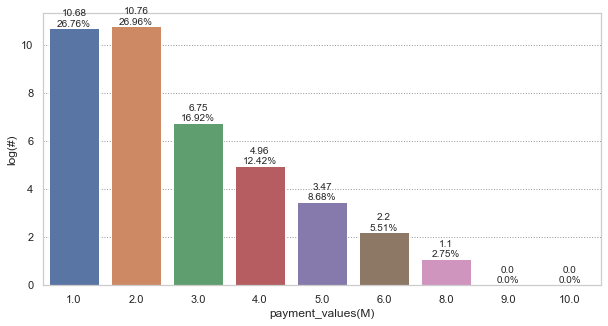

In [70]:
payment_values = df.groupby('payment_value(M)').count().iloc[:,0]
barplot(x=payment_values.index.tolist(), y=np.log(payment_values), ylabel='log(#)', xlabel='payment_values(M)') # Passer au log pour une meilleure visibilité

### 1.6.5. Encodage Ordinal

In [71]:
dfe = pd.merge(df, products_categ, how='left', on='product_category_name')
dfe = pd.merge(dfe, customers.groupby('customer_state').count()['customer_unique_id'], how='left', on='customer_state')
dfe = pd.merge(dfe, ptypes, how='left', on='payment_type')
dfe = dfe.drop(columns=['product_category_name', 'payment_type', 'customer_state'])
dfe = dfe.rename(columns={'customer_unique_id_x':'customer_unique_id', 'product_id':'pcateg', 'customer_unique_id_y':'customer_state', 'order_id':'payment_type'})

for col in ['pcateg', 'customer_state', 'payment_type']:
    dfe = OrdinalEncoding(dfe, col)
dfe

customer_unique_id  Freshness(R)  multi_orders(F)  \
0      0000366f3b9a7992bf8c76cfdf3221e2      0.840025                0   
1      0000b849f77a49e4a4ce2b2a4ca5be3f      0.835723                0   
2      0000f46a3911fa3c0805444483337064      0.227613                0   
3      0000f6ccb0745a6a4b88665a16c9f078      0.538405                0   
4      0004aac84e0df4da2b147fca70cf8255      0.585848                0   
...                                 ...           ...              ...   
91471  fffcf5a5ff07b0908bd4e2dbc735a684      0.357120                0   
91472  fffea47cd6d3cc0a88bd621562a9d061      0.623285                0   
91473  ffff371b4d645b6ecea244b27531430a      0.182688                0   
91474  ffff5962728ec6157033ef9805bacc48      0.828774                0   
91475  ffffd2657e2aad2907e67c3e9daecbeb      0.303834                0   

       payment_value(M)  review_score(S)  daytime  weekday  month  \
0                   2.0                5      1.0      3.0   10.0   
1                   1.0                4      1.0      6.0   10.0   
2                   1.0                3      2.0      2.0    8.0   
3                   1.0                4      2.0      3.0    1.0   
4                   2.0                5      2.0      5.0    3.0   
...                 ...              ...      ...      ...    ...   
91471               4.0                5      2.0      3.0    7.0   
91472               1.0                4      2.0      1.0    2.0   
91473               2.0                5      3.0      5.0    5.0   
91474               2.0                5      3.0      4.0   10.0   
91475               1.0                5      2.0      5.0   10.0   

       orders_volume  payment_sequential  payment_installments  pcateg  \
0                  1                   1                     8    63.0   
1                  1                   1                     1    62.0   
2                  1                   1                     8    55.0   
3                  1                   1                     4    56.0   
4                  1                   1                     6    56.0   
...              ...                 ...                   ...     ...   
91471              3                   1                    10    62.0   
91472              1                   1                     1    49.0   
91473              1                   1                     1    54.0   
91474              1                   1                     5    57.0   
91475              1                   1                     4    50.0   

       customer_state  payment_type  
0                 5.0           3.0  
1                 5.0           3.0  
2                 4.0           3.0  
3                 4.0           3.0  
4                 5.0           3.0  
...               ...           ...  
91471             4.0           3.0  
91472             4.0           3.0  
91473             4.0           3.0  
91474             4.0           3.0  
91475             0.0           3.0  

[91476 rows x 14 columns]

Le data set contient :
	- 91476 lignes et 14 colonnes.
	- 0 valeurs manquantes, ce qui représente 0.0 % du data set.
Voici un sous-échantillon aléatoire :


customer_unique_id  Freshness(R)  multi_orders(F)  \
49258  89dedfe3145383ccc0d7be54ba4da961      0.472245                0   
39046  6d010016ac86b19d9b3a6829cd9e7f03      0.841801                0   
39479  6e2b3a7037cf0a73a8c5d83e0f850a13      0.523538                0   
88432  f74a075d2c4f68917c7d568df06b1e90      0.945202                0   
62483  ae99f4ea382ddb241ec576e0d61cc20b      0.218462                0   
1310   0399fc306dd05be4530b4df550736685      0.244840                0   
85618  ef5bd3381e0ecb0f15d87a166819489e      0.180164                0   
74262  cfa94943c5b2949c02d59ea6495cf549      0.783847                0   
23181  40be9d4423e554598788cab8272da64d      0.579591                0   
85416  eec7b50baf267074b41ba9bf4add6f30      0.493251                0   

       payment_value(M)  review_score(S)  daytime  weekday  month  \
49258               2.0                4      2.0      1.0   11.0   
39046               2.0                5      3.0      2.0   10.0   
39479               1.0                4      3.0      6.0    1.0   
88432               1.0                5      3.0      1.0    9.0   
62483               1.0                5      3.0      0.0    8.0   
1310                2.0                4      2.0      4.0    8.0   
85618               1.0                3      2.0      1.0    5.0   
74262               1.0                5      1.0      1.0    6.0   
23181               2.0                4      1.0      2.0    3.0   
85416               1.0                5      1.0      6.0    0.0   

       orders_volume  product_category_name payment_type  payment_sequential  \
49258              2          esporte_lazer  credit_card                   1   
39046              1     ferramentas_jardim  credit_card                   1   
39479              1  utilidades_domesticas  credit_card                   1   
88432              1           beleza_saude  credit_card                   1   
62483              1         consoles_games       boleto                   1   
1310               1        cama_mesa_banho  credit_card                   1   
85618              1        cama_mesa_banho  credit_card                   1   
74262              1             brinquedos  credit_card                   1   
23181              1          esporte_lazer  credit_card                   1   
85416              1           beleza_saude  credit_card                   1   

       payment_installments customer_state  
49258                     8             SP  
39046                     8             RJ  
39479                     3             SP  
88432                     3          other  
62483                     1          other  
1310                      6             RS  
85618                     4             RS  
74262                     1          other  
23181                     4             SP  
85416                     4          other

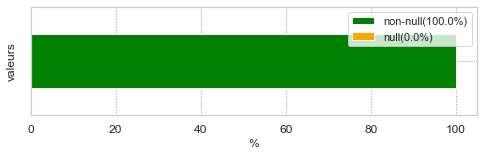

In [72]:
verifier_taille(df)
afficher_echantillon(df, 10)

La base de données d’<strong>Olist</strong> a été agrégée et transformée en un unique clean data set exploitable dans la suite du projet.  

# 2. Analyse Exploratoire

## 2.1. Distributions

In [73]:
dfe.describe()

Freshness(R)  multi_orders(F)  payment_value(M)  review_score(S)  \
count  91476.000000     91476.000000      91476.000000     91476.000000   
mean       0.659525         0.029571          1.539683         4.151624   
std        0.219601         0.169400          0.534249         1.280078   
min        0.000000         0.000000          1.000000         1.000000   
25%        0.503616         0.000000          1.000000         4.000000   
50%        0.686976         0.000000          2.000000         5.000000   
75%        0.837279         0.000000          2.000000         5.000000   
max        1.000000         1.000000         10.000000         5.000000   

            daytime       weekday         month  orders_volume  \
count  91476.000000  91476.000000  91476.000000   91476.000000   
mean       2.046952      3.250077      6.387315       1.188027   
std        0.916291      1.942089      3.226861       0.829505   
min        0.000000      0.000000      0.000000       1.000000   
25%        1.000000      2.000000      4.000000       1.000000   
50%        2.000000      3.000000      7.000000       1.000000   
75%        3.000000      5.000000      9.000000       1.000000   
max        3.000000      6.000000     11.000000      52.000000   

       payment_sequential  payment_installments        pcateg  customer_state  \
count        91476.000000          91476.000000  91476.000000    91476.000000   
mean             1.044602              2.916131     53.964942        3.686267   
std              0.368061              2.702679      9.553646        1.495944   
min              1.000000              1.000000      0.000000        0.000000   
25%              1.000000              1.000000     51.000000        3.000000   
50%              1.000000              2.000000     57.000000        4.000000   
75%              1.000000              4.000000     61.000000        5.000000   
max             26.000000             24.000000     63.000000        5.000000   

       payment_type  
count  91476.000000  
mean       2.701780  
std        0.595534  
min        0.000000  
25%        3.000000  
50%        3.000000  
75%        3.000000  
max        3.000000

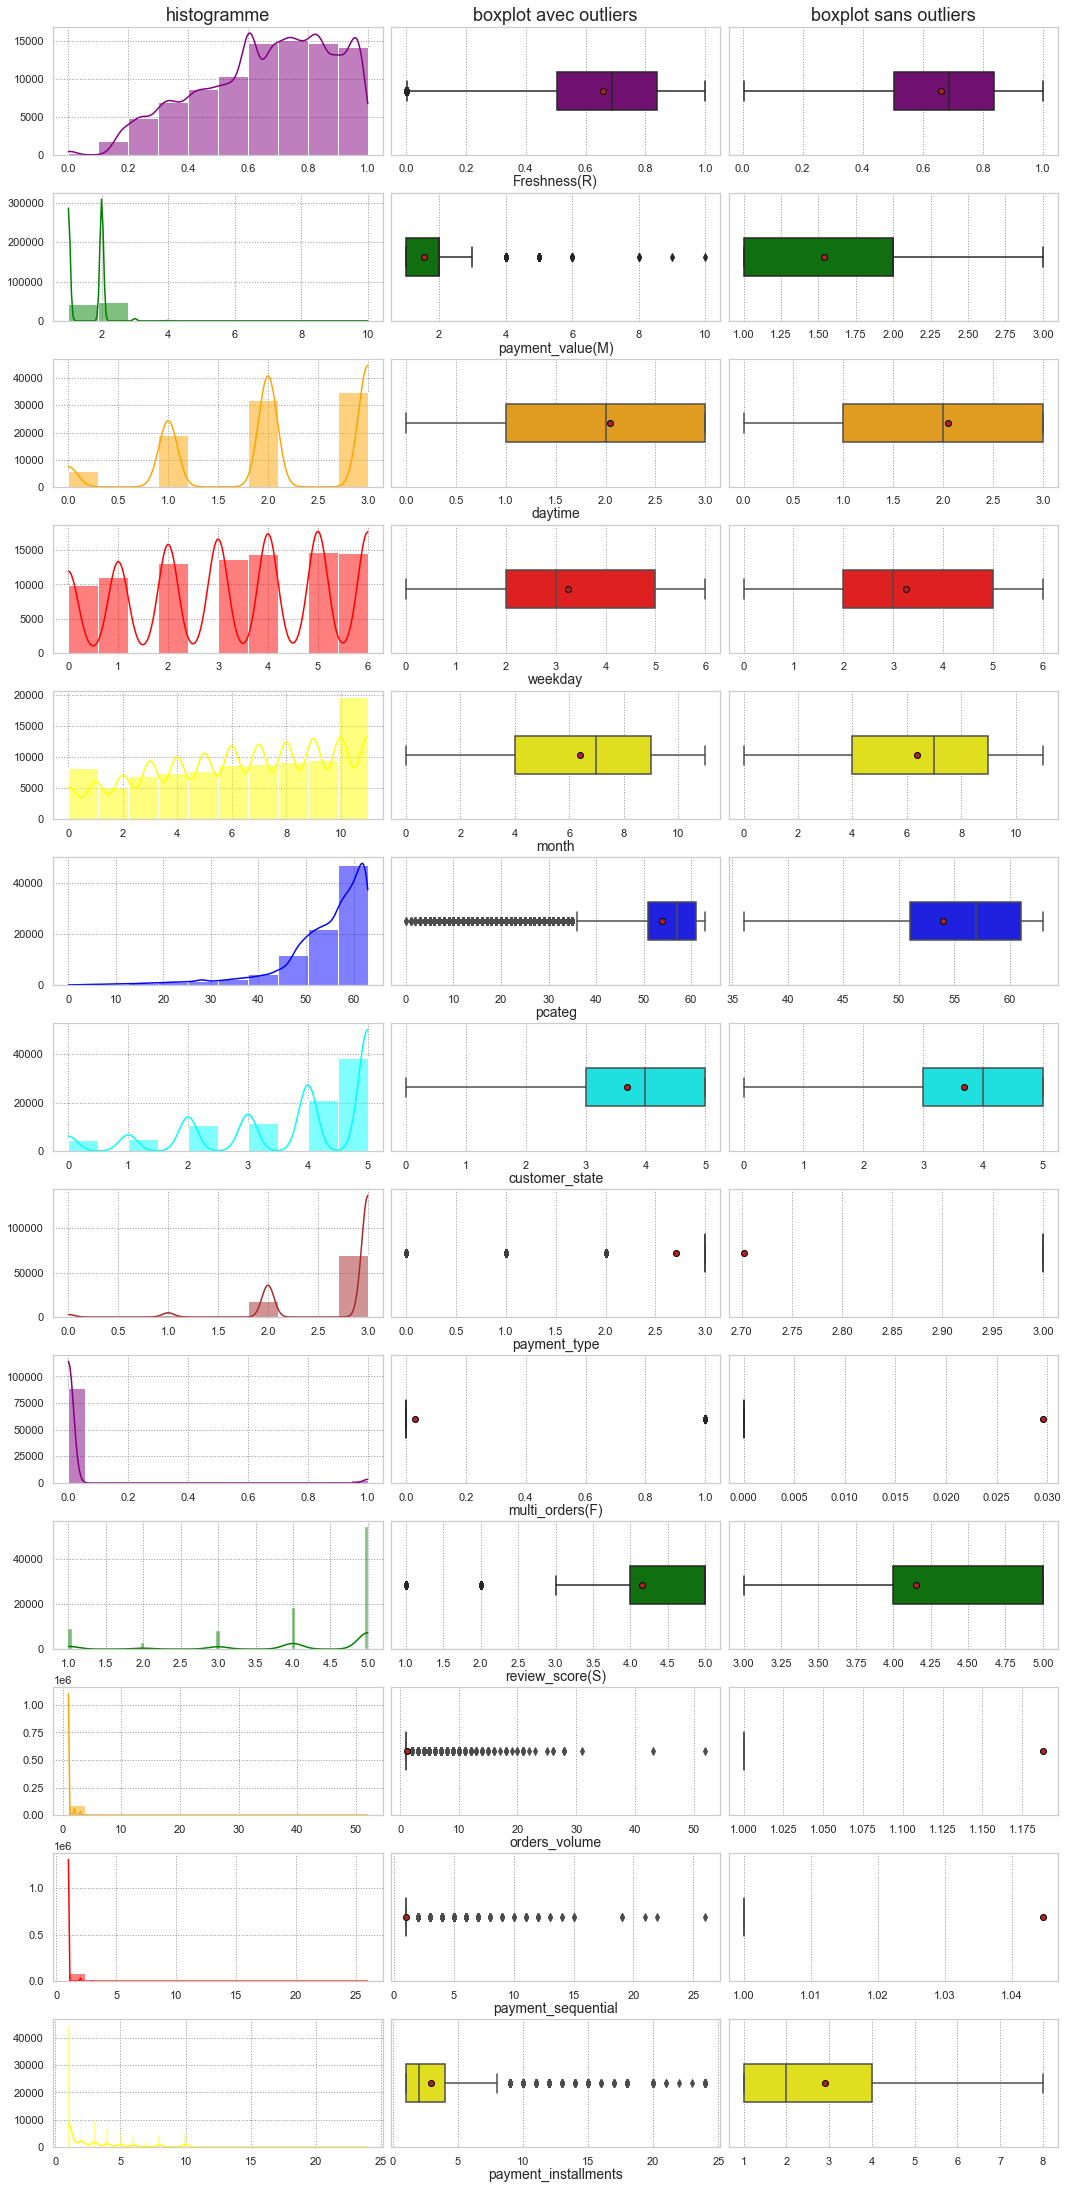

In [74]:
histo_distribution(dfe)

## 2.2. Correlaions

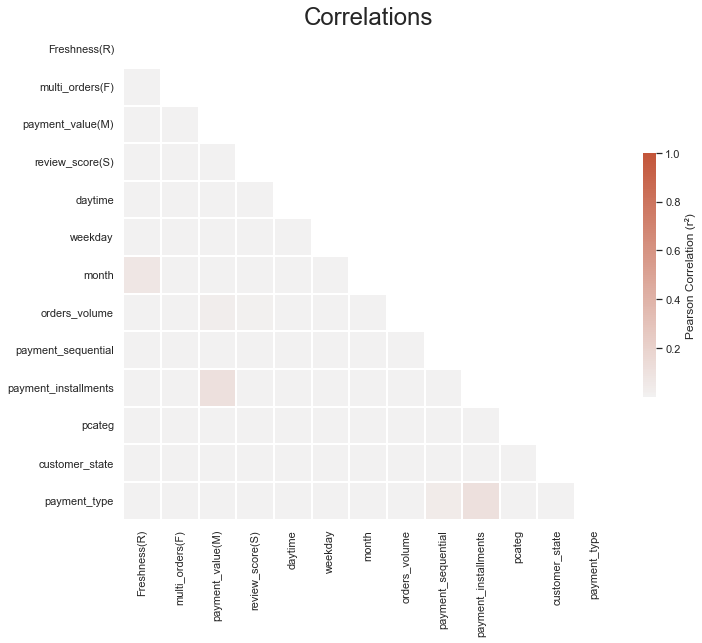

In [75]:
correlation_matrix(dfe)

Il n’existe aucune corrélation entre les variables du data set.

## 2.3. ANAlyse de la VAriance (ANOVA)

In [ ]:
n_iter = 1
kmin = 2
kmax = 13

### 2.3.1. Par Type de Paiements

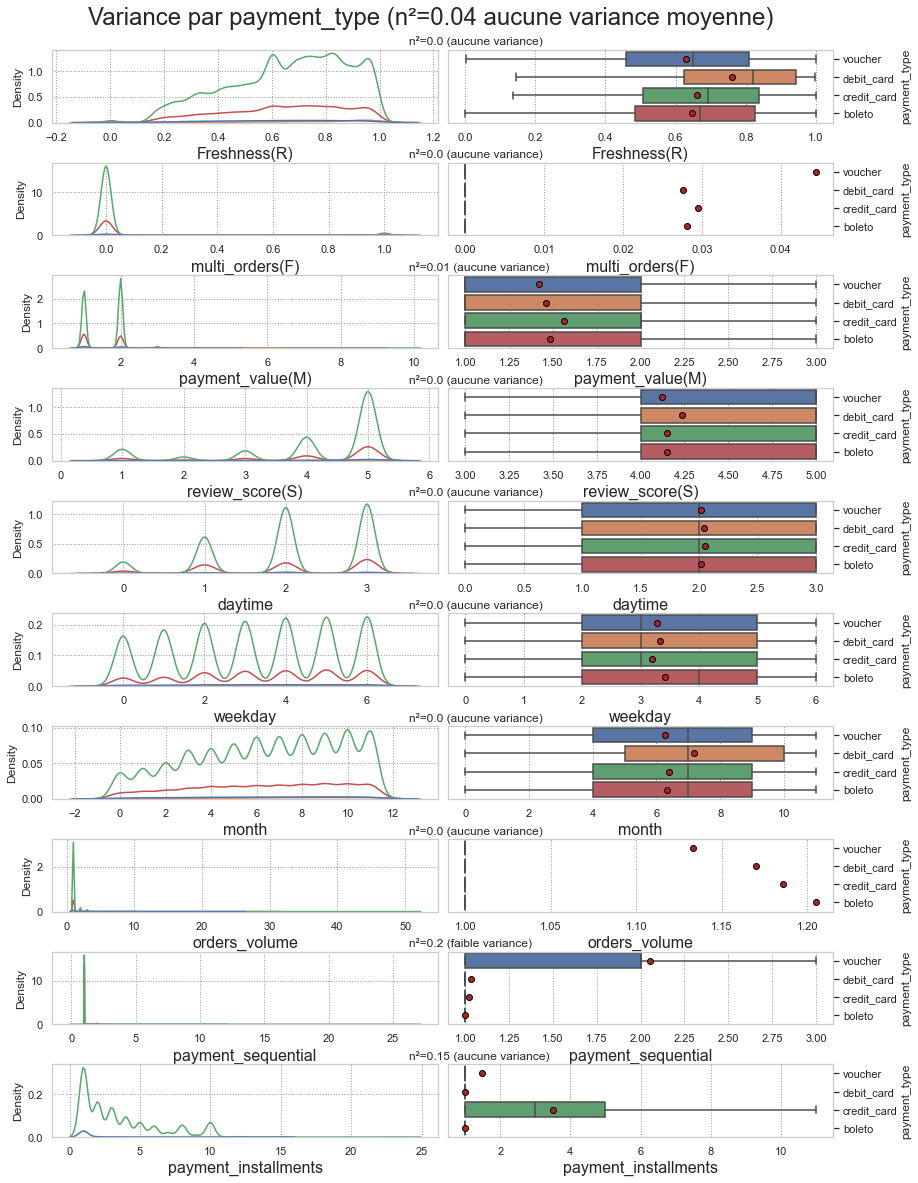

In [76]:
X = 'payment_type'
ANOVA(df, X, yloc=0.91, hspace=0.55, width=7, heigth=0.5)

### 2.3.2. Par Région des Clients

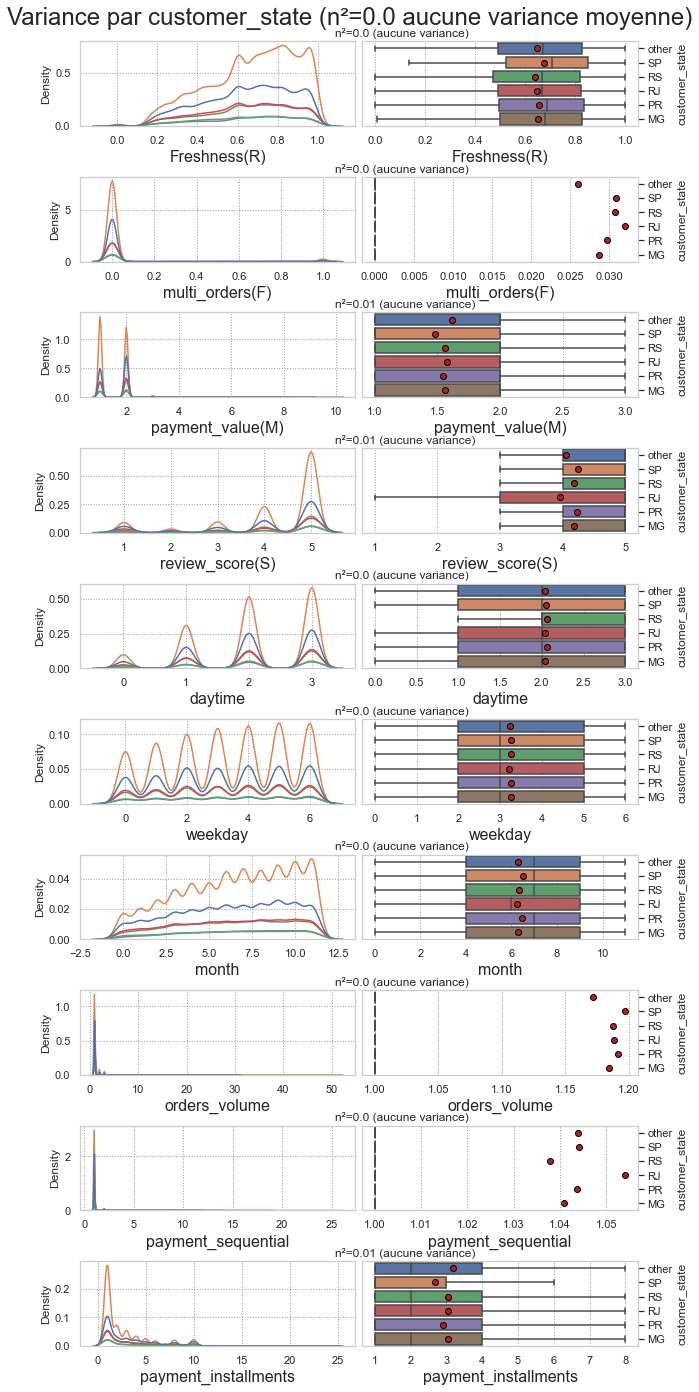

In [77]:
X = 'customer_state'
ANOVA(df, X, yloc=0.9, hspace=0.6, width=5, heigth=0.4)

### 2.3.3. Par Catégorie des Produits

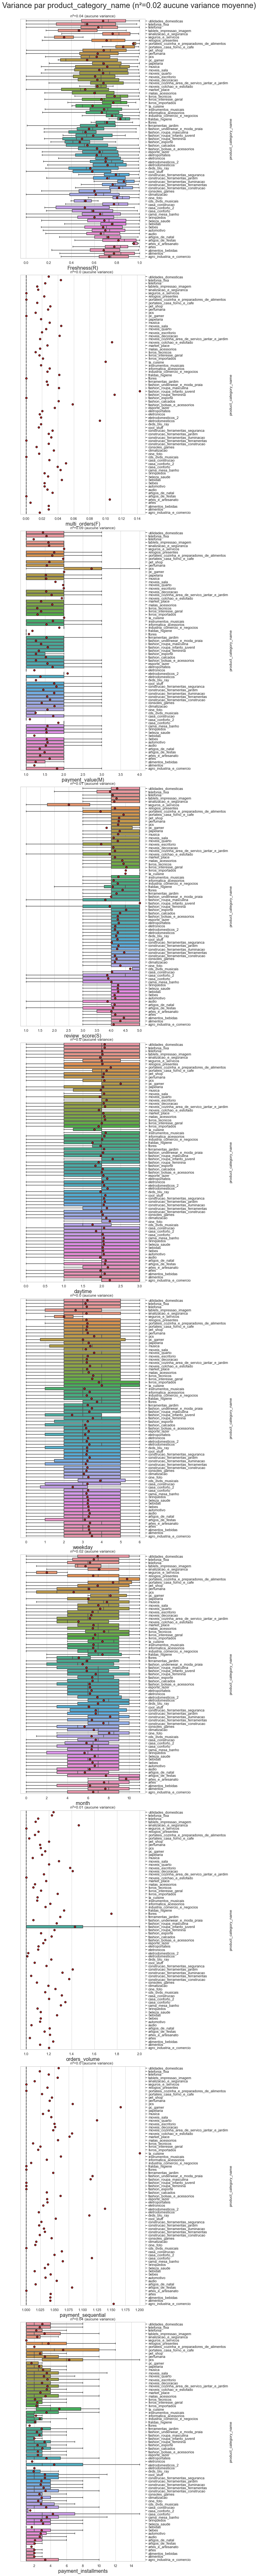

In [78]:
X = 'product_category_name'
ANOVA(df, X, yloc=0.885, hspace=0.07, width=7, heigth=0.2, display_kde=False)

## 2.4. Contingence (CHi2)

### 2.4.1. Type de Paiements & Région des Clients

p-value is:  1.907749174391085e-38
chi=219.854229, critical value=24.995790
At 0.05 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.


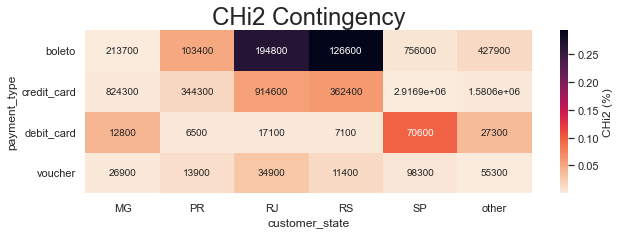

In [79]:
chi2(df, 'payment_type', 'customer_state', heigth=3, width=10)

### 2.4.2. Catgéorie des Produits & Région des Clients

p-value is:  1.4791266687403458e-184
chi=1770.187591, critical value=405.243502
At 0.05 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.


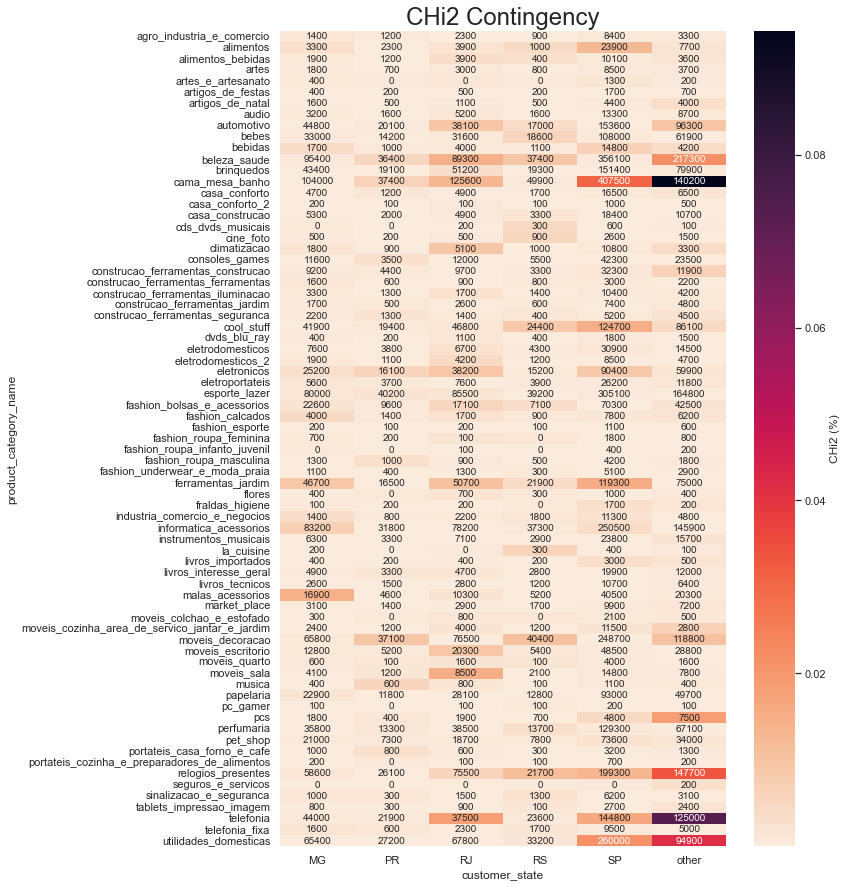

In [80]:
chi2(df, 'product_category_name', 'customer_state', heigth=15, width=10)

### 2.4.3. Catgéorie des Produits & Type de Paiements

p-value is:  2.509761283641448e-72
chi=827.144961, critical value=251.286361
At 0.05 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.


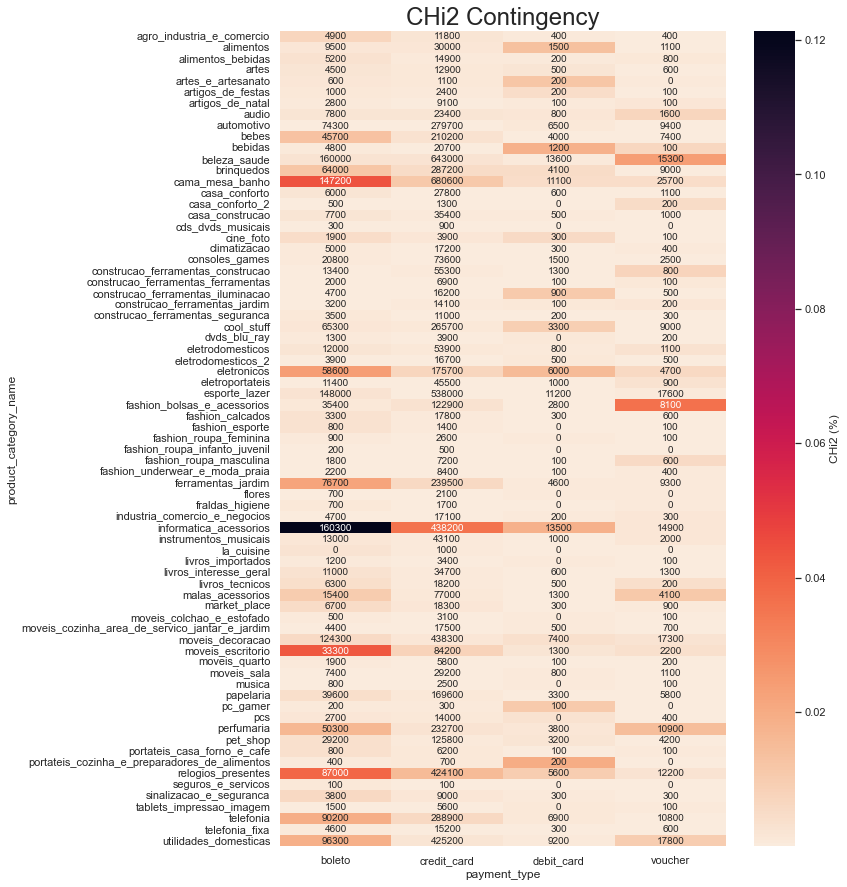

In [81]:
chi2(df, 'product_category_name', 'payment_type', heigth=15, width=10)

# 4. Export des Données

In [83]:
dfe.to_csv('olist.csv', index=False)
orders_freshness.to_csv('orders_freshness.csv', index=False)